In [3]:
import pandas as pd
df = pd.read_pickle('../data/all_cmps_succeeded.pkl')

In [4]:
sources = []
arguments = []

def create_list(row):
    if row:
        if row['savedCalls']:
            return row['savedCalls']
    return [{}]

df_exploded = df.copy()
df_exploded['apis'] = df_exploded['apis'].map(lambda x: create_list(x))
df_exploded = df_exploded.explode('apis')

def get_sources(row):
    if row['apis']:
        if row['apis']['source']:
            return row['apis']['source']
    return ''

df_exploded['source'] = df_exploded.apply(lambda x: get_sources(x), axis=1)

def get_first_argument(row):
    if row['apis']:
        if row['apis']['arguments']:
            return row['apis']['arguments'][0]
    return []

df_exploded['target'] = df_exploded.apply(lambda x: get_first_argument(x), axis=1)

def get_second_argument(row):
    if row['apis']:
        if row['apis']['arguments']:
            if len(row['apis']['arguments']) > 1:
                return row['apis']['arguments'][1]
    return []

df_exploded['argument'] = df_exploded.apply(lambda x: get_second_argument(x), axis=1)

df_exploded = df_exploded.drop(['cmps', 'requests', 'apis', 'cookies', 'targets'], axis=1)

display(df_exploded)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,https://pub.doubleverify.com/dvtag/21184944/DV...,https://vtrk.doubleverify.com?t=event&ec=page&...,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://stats.g.doubleclick.net/g/collect?v=2&...,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,https://amplify.outbrain.com/cp/obtp.js,//tr.outbrain.com/unifiedPixel?optOut=false&bu...,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.analytics.google.com/g/collect...,[]
...,...,...,...,...,...,...
9610,http://thefa.com/,https://www.thefa.com/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]
9610,http://thefa.com/,https://www.thefa.com/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]
9610,http://thefa.com/,https://www.thefa.com/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]
9610,http://thefa.com/,https://www.thefa.com/,optOut,https://www.googletagmanager.com/gtag/js?id=G-...,https://region1.google-analytics.com/g/collect...,[]


In [5]:
from urllib.parse import urlparse

def base_url(row, column):
    url = row[column]
    if row[column] == "" or row[column] == []:
        url = row['initialUrl']
    return urlparse(url).netloc

df_base_urls = df_exploded.copy()
df_base_urls['source'] = df_exploded.apply(lambda row: base_url(row, 'source'), axis=1)
df_base_urls['target'] = df_exploded.apply(lambda row: base_url(row, 'target'), axis=1)

display(df_base_urls)

,initialUrl,finalUrl,autoconsent_action,source,target,argument
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,pub.doubleverify.com,vtrk.doubleverify.com,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,www.googletagmanager.com,region1.analytics.google.com,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,www.googletagmanager.com,stats.g.doubleclick.net,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,amplify.outbrain.com,tr.outbrain.com,[]
8,http://medpagetoday.com/,https://www.medpagetoday.com/,optIn,www.googletagmanager.com,region1.analytics.google.com,[]
...,...,...,...,...,...,...
9610,http://thefa.com/,https://www.thefa.com/,optOut,www.googletagmanager.com,region1.google-analytics.com,[]
9610,http://thefa.com/,https://www.thefa.com/,optOut,www.googletagmanager.com,region1.google-analytics.com,[]
9610,http://thefa.com/,https://www.thefa.com/,optOut,www.googletagmanager.com,region1.google-analytics.com,[]
9610,http://thefa.com/,https://www.thefa.com/,optOut,www.googletagmanager.com,region1.google-analytics.com,[]


In [7]:
print("nr of urls ", len(df_base_urls.groupby(['initialUrl'])))
print("nr of different sources", len(df_base_urls.groupby(['source'])))
print("nr of different targets", len(df_base_urls.groupby(['target'])))

nr of urls  2006
nr of different sources 1261
nr of different targets 1240


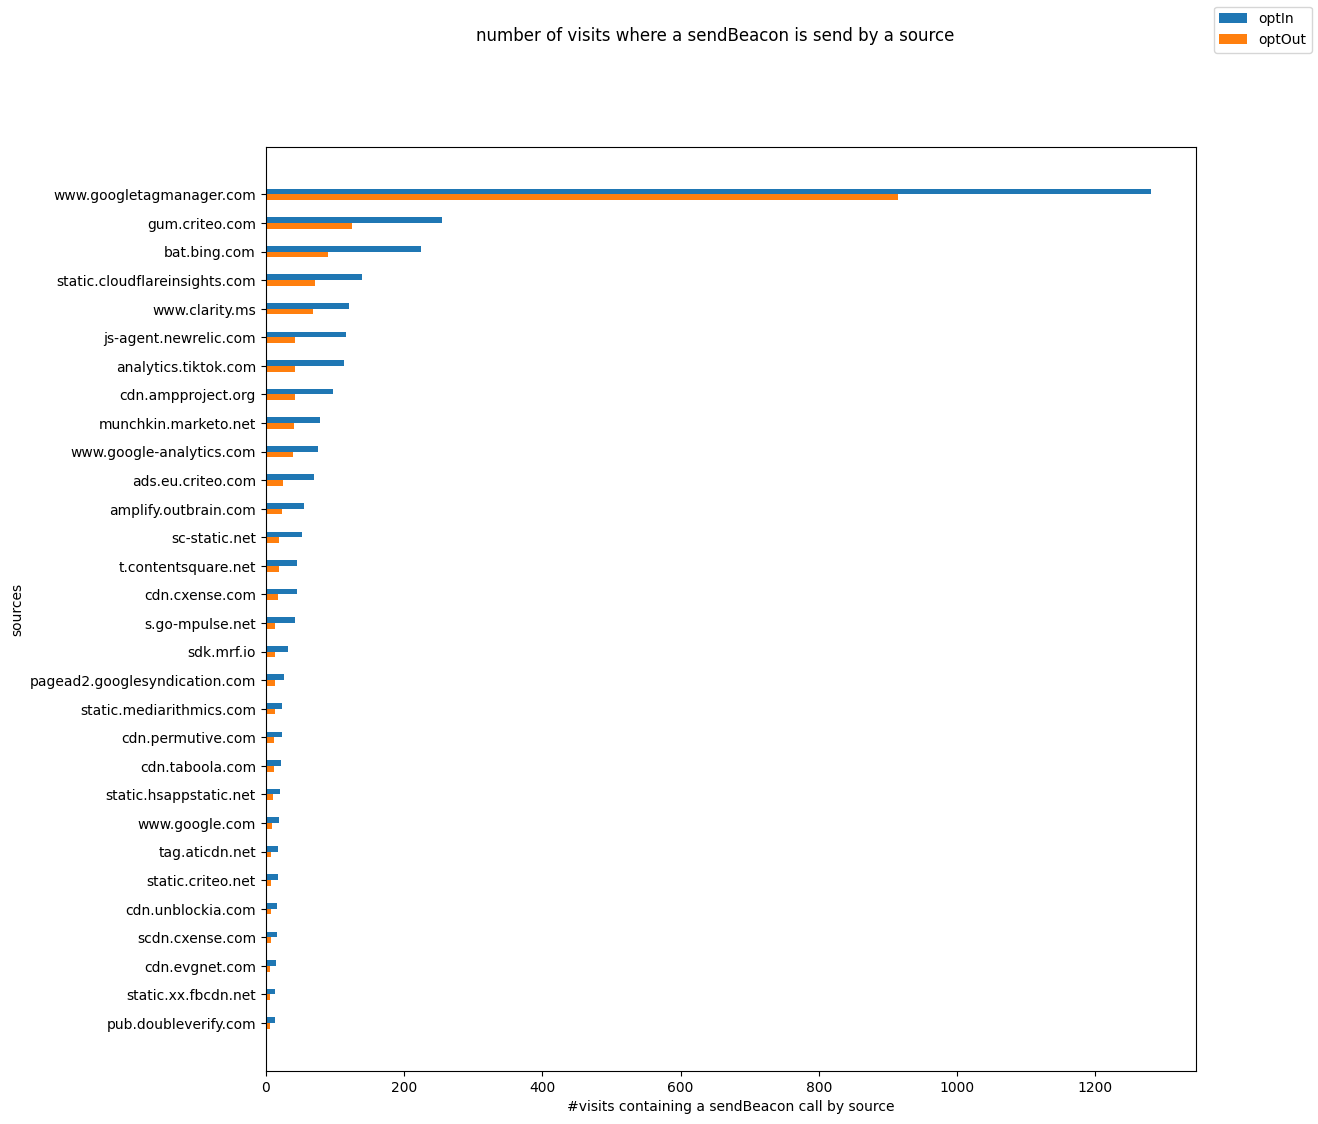

In [8]:
sources_optIn = {}
sources_optOut = {}

def get_sources_count(frame, sources):
    items = frame.source.value_counts().items()
    for item, _ in items:
        if not item in sources:
            sources[item] = 0
        sources[item] += 1

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_sources_count(frame, sources_optIn))
sources_optIn = list(reversed(sorted(sources_optIn.items(), key=lambda item: item[1])))

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: get_sources_count(frame, sources_optOut))
sources_optOut = list(reversed(sorted(sources_optOut.items(), key=lambda item: item[1])))

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))
NR_ITEMS_IN_GRAPH = 30
ind = np.arange(NR_ITEMS_IN_GRAPH)
width = 0.2
labels = []

counts_optIn = []
for index, (item, count) in enumerate(sources_optIn):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optIn.append(count)
    labels.append(item)

ax.barh(NR_ITEMS_IN_GRAPH-ind+width/2, counts_optIn, width, label="optIn")

counts_optOut = []
for index, (item, count) in enumerate(sources_optOut):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optOut.append(count)

ax.barh(NR_ITEMS_IN_GRAPH-ind-width/2, counts_optOut, width, label="optOut")

fig.suptitle("number of visits where a sendBeacon is send by a source")
fig.legend(["optIn", "optOut"])
ax.set_yticks(NR_ITEMS_IN_GRAPH-ind)
ax.set_yticklabels(labels)#.xticks(ind+width/2, labels)
ax.set_xlabel("#visits containing a sendBeacon call by source")
ax.set_ylabel("sources")
plt.show()

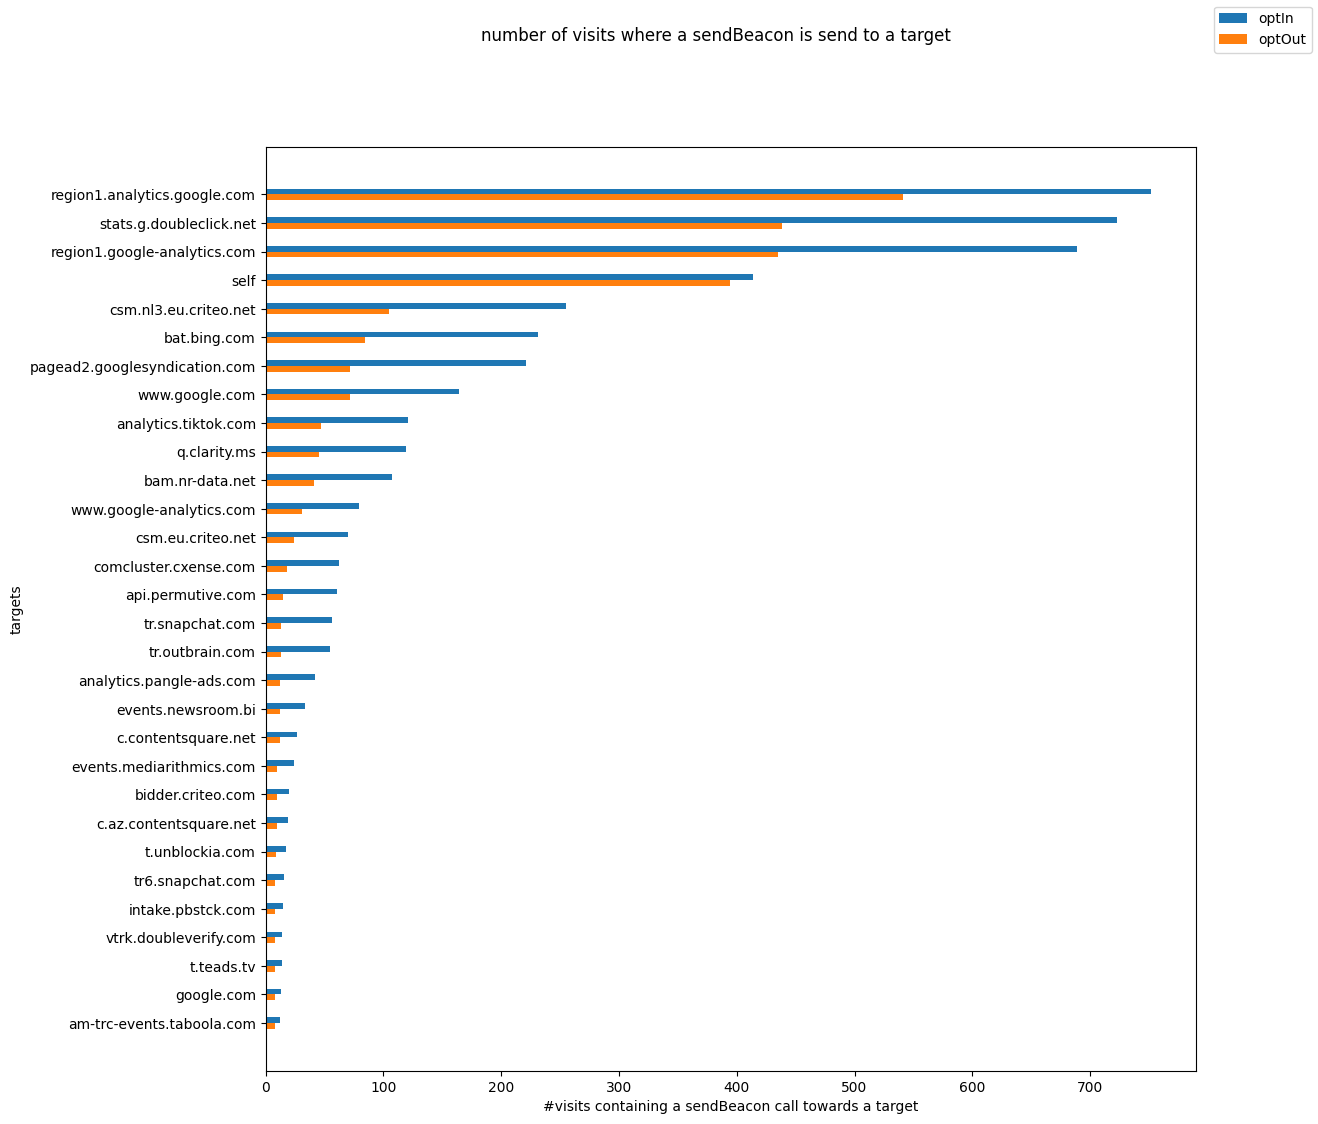

In [9]:
targets_optIn = {}
targets_optOut = {}

def get_targets_count(frame, targets):
    items = frame.target.value_counts().items()
    for item, _ in items:
        if item == "":
            item = "self"
        if not item in targets:
            targets[item] = 0
        targets[item] += 1

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_targets_count(frame, targets_optIn))
targets_optIn = list(reversed(sorted(targets_optIn.items(), key=lambda item: item[1])))

df_grouped = df_base_urls[df_base_urls['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: get_targets_count(frame, targets_optOut))
targets_optOut = list(reversed(sorted(targets_optOut.items(), key=lambda item: item[1])))

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12,12))
NR_ITEMS_IN_GRAPH = 30
ind = np.arange(NR_ITEMS_IN_GRAPH)
width = 0.2
labels = []

counts_optIn = []
for index, (item, count) in enumerate(targets_optIn):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optIn.append(count)
    labels.append(item)

ax.barh(NR_ITEMS_IN_GRAPH-ind+width/2, counts_optIn, width, label="optIn")

counts_optOut = []
for index, (item, count) in enumerate(targets_optOut):
    if index >= NR_ITEMS_IN_GRAPH:
        break
    counts_optOut.append(count)

ax.barh(NR_ITEMS_IN_GRAPH-ind-width/2, counts_optOut, width, label="optOut")

fig.suptitle("number of visits where a sendBeacon is send to a target")
fig.legend(["optIn", "optOut"])
ax.set_yticks(NR_ITEMS_IN_GRAPH-ind)
ax.set_yticklabels(labels)
ax.set_xlabel("#visits containing a sendBeacon call towards a target")
ax.set_ylabel("targets")
plt.show()

In [11]:
df_google = df_base_urls[df_base_urls['source'] == 'www.googletagmanager.com']
display(df_google.target.value_counts().describe())
display(df_google.target.value_counts())


count      55.000000
mean      148.309091
std       618.187400
min         1.000000
25%         1.000000
50%         2.000000
75%         3.500000
max      3195.000000
Name: count, dtype: float64

target
region1.analytics.google.com            3195
region1.google-analytics.com            3137
stats.g.doubleclick.net                 1313
pagead2.googlesyndication.com            191
www.google.com                           188
google.com                                36
sgtm.splunk.com                            7
tagging.conde.digital                      5
sgtm.livesport.cz                          5
sst.mohito.com                             4
europe.event-tracking.samsung.com          4
sst.reserved.com                           4
www.merchant-center-analytics.goog         4
mhcr.telegraaf.nl                          4
gtm.udemy.com                              3
sst.sinsay.com                             2
analytics.nokia.com                        2
ssgtm.dating.com                           2
mailchimp.com                              2
sst.one.com                                2
collect.invisalign.com                     2
gtm.quantcast.com                          2
gfb